In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('insurance.csv')
dataset.head()
X=dataset.iloc[:,0:-1].values
Y=dataset.iloc[:,-1].values
X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()
X[:,1]=labelencoder_x.fit_transform(X[:,1])
X

array([[19, 0, 27.9, 0, 'yes', 'southwest'],
       [18, 1, 33.77, 1, 'no', 'southeast'],
       [28, 1, 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 0, 36.85, 0, 'no', 'southeast'],
       [21, 0, 25.8, 0, 'no', 'southwest'],
       [61, 0, 29.07, 0, 'yes', 'northwest']], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()
X[:,4]=labelencoder_x.fit_transform(X[:,4])
X

array([[19, 0, 27.9, 0, 1, 'southwest'],
       [18, 1, 33.77, 1, 0, 'southeast'],
       [28, 1, 33.0, 3, 0, 'southeast'],
       ...,
       [18, 0, 36.85, 0, 0, 'southeast'],
       [21, 0, 25.8, 0, 0, 'southwest'],
       [61, 0, 29.07, 0, 1, 'northwest']], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder


labelencoder_x = LabelEncoder()
X[:, 5] = labelencoder_x.fit_transform(X[:, 5])
X

array([[19, 0, 27.9, 0, 1, 3],
       [18, 1, 33.77, 1, 0, 2],
       [28, 1, 33.0, 3, 0, 2],
       ...,
       [18, 0, 36.85, 0, 0, 2],
       [21, 0, 25.8, 0, 0, 3],
       [61, 0, 29.07, 0, 1, 1]], dtype=object)

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#Argument should be categorial data feild


# Country column
# Assuming X is your dataset
# Define the ColumnTransformer with OneHotEncoder for the first column (index 0)
ct = ColumnTransformer(
    transformers=[
        ('Country', OneHotEncoder(drop='first'), [5])
    ], remainder='passthrough'
)

# Fit and transform the dataset
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, ..., 27.9, 0, 1],
       [0.0, 1.0, 0.0, ..., 33.77, 1, 0],
       [0.0, 1.0, 0.0, ..., 33.0, 3, 0],
       ...,
       [0.0, 1.0, 0.0, ..., 36.85, 0, 0],
       [0.0, 0.0, 1.0, ..., 25.8, 0, 0],
       [1.0, 0.0, 0.0, ..., 29.07, 0, 1]], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
len(X_train), len(X_test), len(Y_train), len(Y_test)

(1070, 268, 1070, 268)

# Multi Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

Y_pred=regressor.predict(X_test)

list(zip(Y_test,Y_pred))


[(9724.53, 11169.927118789876),
 (8547.6913, 9486.709085405562),
 (45702.02235, 38181.12305255844),
 (12950.0712, 16266.31328947719),
 (9644.2525, 6914.648007289912),
 (4500.33925, 3963.4848759883444),
 (2198.18985, 1579.396912768143),
 (11436.73815, 14385.256568696494),
 (7537.1639, 9012.579695808758),
 (5425.02335, 7508.460676946428),
 (6753.038, 4491.767281771374),
 (10493.9458, 10279.583941461797),
 (7337.748, 8801.297505994035),
 (4185.0979, 3798.020130228888),
 (18310.742, 27926.200965643322),
 (10702.6424, 10715.1158201356),
 (12523.6048, 11288.975621267147),
 (3490.5491, 6105.017680390791),
 (6457.8434, 8241.041173782747),
 (33475.81715, 27144.50894993334),
 (23967.38305, 33644.09097034397),
 (12643.3778, 14355.104327491825),
 (23045.56616, 11737.204332182539),
 (23065.4207, 32137.433498320584),
 (1674.6323, 4170.059129750516),
 (4667.60765, 9254.960513111813),
 (3732.6251, 1084.3375099829118),
 (7682.67, 9804.170845208237),
 (3756.6216, 3771.045955435344),
 (8413.46305, 10431.

## Backward Elimination

In [1]:
import statsmodels.api as sm

# adding X_0=1 for b_0 therefore we will add X_0 in X
X = np.array(X, dtype=float)
Y = np.array(Y, dtype=float)

# X=np.append(arr=np.ones((50,1)).astype(int),values=X,axis=1)
# # X

# Backward Elimination
X = np.append(arr=np.ones((X.shape[0], 1)).astype(int), values=X, axis=1)  # Adding the intercept term


# # X_opt will contain only variables that are significant
X_opt = X[:, [0, 1, 2, 3, 4, 5,6,7,8]]
# X_opt = X[:, list(range(X.shape[1]))]

# Fit the model will all possible predictor
regressor_ols = sm.OLS(endog=Y, exog=X_opt).fit()
regressor_ols.summary()

NameError: name 'np' is not defined

In [10]:

X_opt=X[:,[0,1,3,4,5,6,7]]

# Fit the model will all possible predictor
regressor_ols=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     32.10
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           3.15e-36
Time:                        14:15:15   Log-Likelihood:                -14387.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1331   BIC:                         2.882e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6519.0742   1838.178     -3.546      0.000   -1.01e+04   -2913.032
x1         -1060.7013    772.429     -1.373      0.170   -2576.013     454.611
x2         -1639.4930    765.141     -2.143      0.032   -3140.508    -138.478
x3           242.1894     22.246     10.887      0.000     198.548     285.831
x4          1311.5834    621.292      2.111      0.035      92.766    2530.401
x5           315.6468     51.807      6.093      0.000     214.014     417.279
x6           555.6482    257.863      2.155      0.031      49.786    1061.510
==============================================================================
Omnibus:                      322.562   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              595.923
Skew:                           1.507   Prob(JB):                    3.95e-130
Kurtosis:                       4.268   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:

X_opt=X[:,[0,3,4,5,6,7]]

# Fit the model will all possible predictor
regressor_ols=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     38.12
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           1.21e-36
Time:                        14:15:17   Log-Likelihood:                -14388.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1332   BIC:                         2.882e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7148.1789   1780.765     -4.014      0.000   -1.06e+04   -3654.770
x1         -1297.2956    723.665     -1.793      0.073   -2716.942     122.351
x2           241.6524     22.250     10.861      0.000     198.003     285.302
x3          1317.2585    621.484      2.120      0.034      98.064    2536.454
x4           326.0890     51.263      6.361      0.000     225.524     426.654
x5           543.1675    257.788      2.107      0.035      37.452    1048.883
==============================================================================
Omnibus:                      322.317   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              594.844
Skew:                           1.508   Prob(JB):                    6.78e-130
Kurtosis:                       4.256   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:

X_opt=X[:,[0,4,5,6,7]]

# Fit the model will all possible predictor
regressor_ols=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     46.77
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           8.05e-37
Time:                        14:15:19   Log-Likelihood:                -14390.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1333   BIC:                         2.882e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7459.9696   1773.722     -4.206      0.000   -1.09e+04   -3980.380
x1           241.2635     22.268     10.835      0.000     197.580     284.947
x2          1321.7198    621.995      2.125      0.034     101.523    2541.916
x3           326.7615     51.304      6.369      0.000     226.116     427.407
x4           533.1681    257.942      2.067      0.039      27.152    1039.185
==============================================================================
Omnibus:                      321.539   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.267
Skew:                           1.506   Prob(JB):                    2.46e-129
Kurtosis:                       4.243   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test,Y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R-squared (R²)
r2 = r2_score(Y_test, Y_pred)
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 3933.272649405239
Mean Squared Error (MSE): 31827950.229523797
Root Mean Squared Error (RMSE): 5641.6265588501865
R-squared (R²): 0.7999876970680436


## Polynomial Regression


In [13]:
from sklearn.preprocessing import PolynomialFeatures
# Transform the matrix into new feature of matrix contain independent variable and may be it power of "n" where n=1,2...
poly_reg=PolynomialFeatures(degree=4)#default degree is 02
x_poly_matrix=poly_reg.fit_transform(X_train)

#b_0*x_1('Created Automatically')+b_1*x_1+b_2*(x_1)^2

Mean Absolute Error (MAE): 3245.934994365097
Mean Squared Error (MSE): 24386687.17406298
Root Mean Squared Error (RMSE): 4938.287878816197
R-squared (R²): 0.8467498715000185


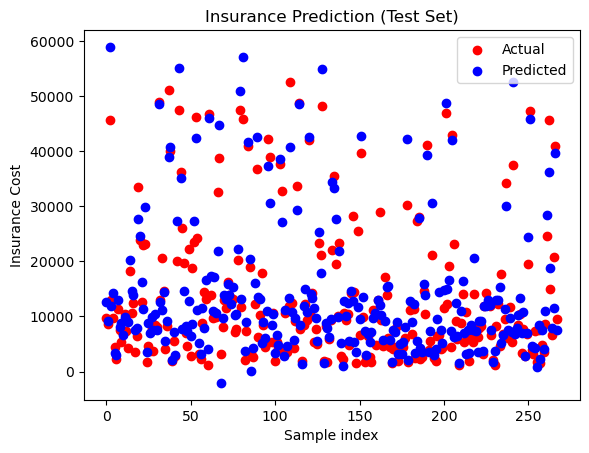

In [15]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
x_poly_matrix

regressor = LinearRegression()
regressor.fit(x_poly_matrix, Y_train)

# To make predictions on the training data
Y_pred_train = regressor.predict(x_poly_matrix)

X_poly_test = poly_reg.transform(X_test)

# Make predictions on the test data
Y_pred_test = regressor.predict(X_poly_test)

# Evaluate the model on the test data
mae = mean_absolute_error(Y_test, Y_pred_test)
mse = mean_squared_error(Y_test, Y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred_test)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Optionally, plot the results
plt.scatter(range(len(Y_test)), Y_test, color='red', label='Actual')
plt.scatter(range(len(Y_test)), Y_pred_test, color='blue', label='Predicted')
plt.title("Insurance Prediction (Test Set)")
plt.xlabel("Sample index")
plt.ylabel("Insurance Cost")
plt.legend()
plt.show()